# NYC Restaurant Inspection Results

In [1]:
import pandas as pd
from sodapy import Socrata
from config import API_Key, username, password
import requests
import json
import matplotlib.pyplot as plt

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.io import show, output_notebook
from bokeh.transform import dodge
from bokeh.core.properties import value

In [2]:
# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us", API_Key, username, password)

# Returned as JSON from API by sodapy.
data = client.get("43nn-pn8j",limit=381912)

# Convert to pandas DataFrame
data_df = pd.DataFrame.from_records(data)

In [17]:
data_df.head()

,action,boro,building,camis,critical_flag,cuisine_description,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-05-01T06:00:34.000,5,MORRIS PARK AVE,08C,Pesticide use not in accordance with label or ...,10462
1,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,2018-05-11T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-05-01T06:00:34.000,5,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
2,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-05-01T06:00:34.000,7,MORRIS PARK AVE,06D,"Food contact surface not properly washed, rins...",10462
3,Violations were cited in the following area(s).,BRONX,1007,30075445,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2017-05-18T00:00:00.000,2017-05-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-05-01T06:00:34.000,7,MORRIS PARK AVE,10F,Non-food contact surface improperly constructe...,10462
4,Violations were cited in the following area(s).,BRONX,1007,30075445,Critical,Bakery,MORRIS PARK BAKE SHOP,A,2016-02-18T00:00:00.000,2016-02-18T00:00:00.000,Cycle Inspection / Initial Inspection,7188924968,2019-05-01T06:00:34.000,10,MORRIS PARK AVE,04L,Evidence of mice or live mice present in facil...,10462


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381698 entries, 0 to 381697
Data columns (total 18 columns):
action                   380361 non-null object
boro                     381698 non-null object
building                 381476 non-null object
camis                    381698 non-null object
critical_flag            381698 non-null object
cuisine_description      381698 non-null object
dba                      381189 non-null object
grade                    192284 non-null object
grade_date               189749 non-null object
inspection_date          381698 non-null object
inspection_type          380361 non-null object
phone                    381689 non-null object
record_date              381698 non-null object
score                    363480 non-null object
street                   381698 non-null object
violation_code           375872 non-null object
violation_description    373270 non-null object
zipcode                  376151 non-null object
dtypes: object(18)
memory

In [16]:
violation_count = data_df.groupby(['boro','camis'])['violation_code'].count()
violation_count = pd.DataFrame(violation_count)
violation_count = violation_count.reset_index()
violation_count.head()

,boro,camis,violation_code
0,BRONX,30075445,6
1,BRONX,40357217,4
2,BRONX,40364296,5
3,BRONX,40364363,6
4,BRONX,40364956,6


In [6]:
output_notebook()

Loading BokehJS ...

In [11]:
boros = list(violation_count['boro'].unique())

boro_data = []
for boro in boros:
    borough = violation_count.loc[violation_count['boro']==boro]['violation_code']
    boro_data.append(borough)
    
boros

['BRONX', 'BROOKLYN', 'MANHATTAN', 'Missing', 'QUEENS', 'STATEN ISLAND']

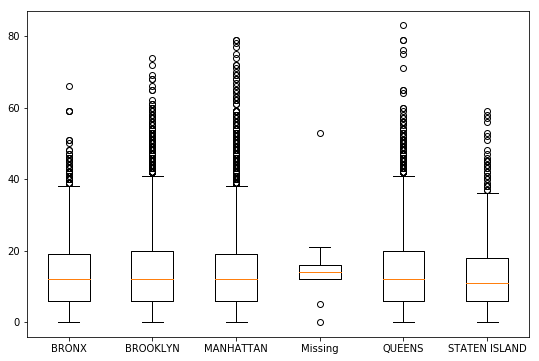

In [14]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(boro_data)

# Add tickers
ax.set_xticklabels(boros)

# Save the figure #fig.savefig('fig1.png', bbox_inches='tight')
plt.show()

In [21]:
cuisine_count = data_df.groupby(['cuisine_description']).count()
#cuisine_count = pd.DataFrame(violation_count)
#cuisine_count = violation_count.reset_index()
cuisine_count

,action,boro,building,camis,critical_flag,dba,grade,grade_date,inspection_date,inspection_type,phone,record_date,score,street,violation_code,violation_description,zipcode
cuisine_description,,,,,,,,,,,,,,,,,
Afghan,168,168,168,168,168,168,92,92,168,168,168,168,160,168,166,166,168
African,1593,1594,1594,1594,1594,1594,665,656,1594,1593,1594,1594,1522,1594,1572,1548,1525
American,82304,82327,82265,82327,82327,82327,43207,42725,82327,82304,82327,82327,78407,82327,81209,80607,80571
Armenian,279,279,279,279,279,279,164,164,279,279,279,279,270,279,273,271,279
Asian,6030,6039,6039,6039,6039,6039,2823,2785,6039,6030,6039,6039,5778,6039,5982,5935,5978
Australian,329,329,329,329,329,329,151,151,329,329,329,329,307,329,326,325,329
Bagels/Pretzels,2722,2724,2724,2724,2724,2724,1460,1444,2724,2722,2724,2724,2625,2724,2693,2678,2652
Bakery,11594,11598,11598,11598,11598,11598,5937,5890,11598,11594,11598,11598,11148,11598,11461,11381,11499
Bangladeshi,1066,1066,1066,1066,1066,1066,432,423,1066,1066,1066,1066,1021,1066,1049,1044,1024
